# NBA MVP Statistical Analysis 

A comparitive analysis on how the MVP statistics trends as compared to all other basketball players in the NBA for all seasons thru 2017. 

**Questions being answered:**  
Are the key stats for NBA Most Valuable Players ( MVPs) consistently better than the average player each year in the USA?

**Data Sets**
1. https://www.kaggle.com/drgilermo/nba-players-stats#Seasons_Stats.csv     ( Stats of all PLayers from 1950 - 2017)
2. https://en.wikipedia.org/wiki/NBA_Most_Valuable_Player_Award   ( MVP each year from 1956) 

**Results** 
The visualization shows stats of MVP against all players each year and also against players who played more than the average number of games each year. 
It is clearly seen that across all the metrics, the MVP stats is consistently better than other players with the exception of Rebound % there are instances of it being below average in many instances.

The visualized data clearly shows that MVP stats are consistently significantly better than the average stats for each year. There is however easily recognizable trend for MVP stats improving from 1956 to 2017.


In [1]:
import pandas as pd
import numpy as np
df_AllNBA = pd.read_csv('data\Seasons_Stats.csv')
df_AllNBA['Player'] = df_AllNBA['Player'].str.replace('\*+','')
df_AllNBA['Year']= df_AllNBA['Year'].dropna().astype(int)
df_AllNBA['Player'] = df_AllNBA['Player'].str.strip()
df_AllNBA = df_AllNBA[df_AllNBA['Year'] >=1956]
df_AllNBA['MeanGamesPerYear'] = df_AllNBA.groupby('Year')['G'].transform(np.mean)
df_AboveAvgGames = df_AllNBA[df_AllNBA['G']>= df_AllNBA['MeanGamesPerYear'] ]



In [317]:
df_MVP = pd.read_csv('data/nba_mvp.csv',encoding = 'unicode_escape')
df_MVP['Season'] = df_MVP['Season'].apply( lambda x : '2000' if x[5:7] == '00' else x[0:2] + x[5:7]).astype(int)
df_MVP['Player'] = df_MVP['Player'].str.strip()

# df_MVP

In [318]:

df_MVP_Stats = pd.merge(df_AllNBA, df_MVP, how = 'inner',left_on = ['Year', 'Player'], right_on = ['Season','Player'])
# merged_df[ (merged_df['Season']== 1955) & (merged_df['Player_x']== 'Bob Pettit') & (merged_df['Player_y']== 'Bob Pettit') & (merged_df['Season']== 1955)  ]



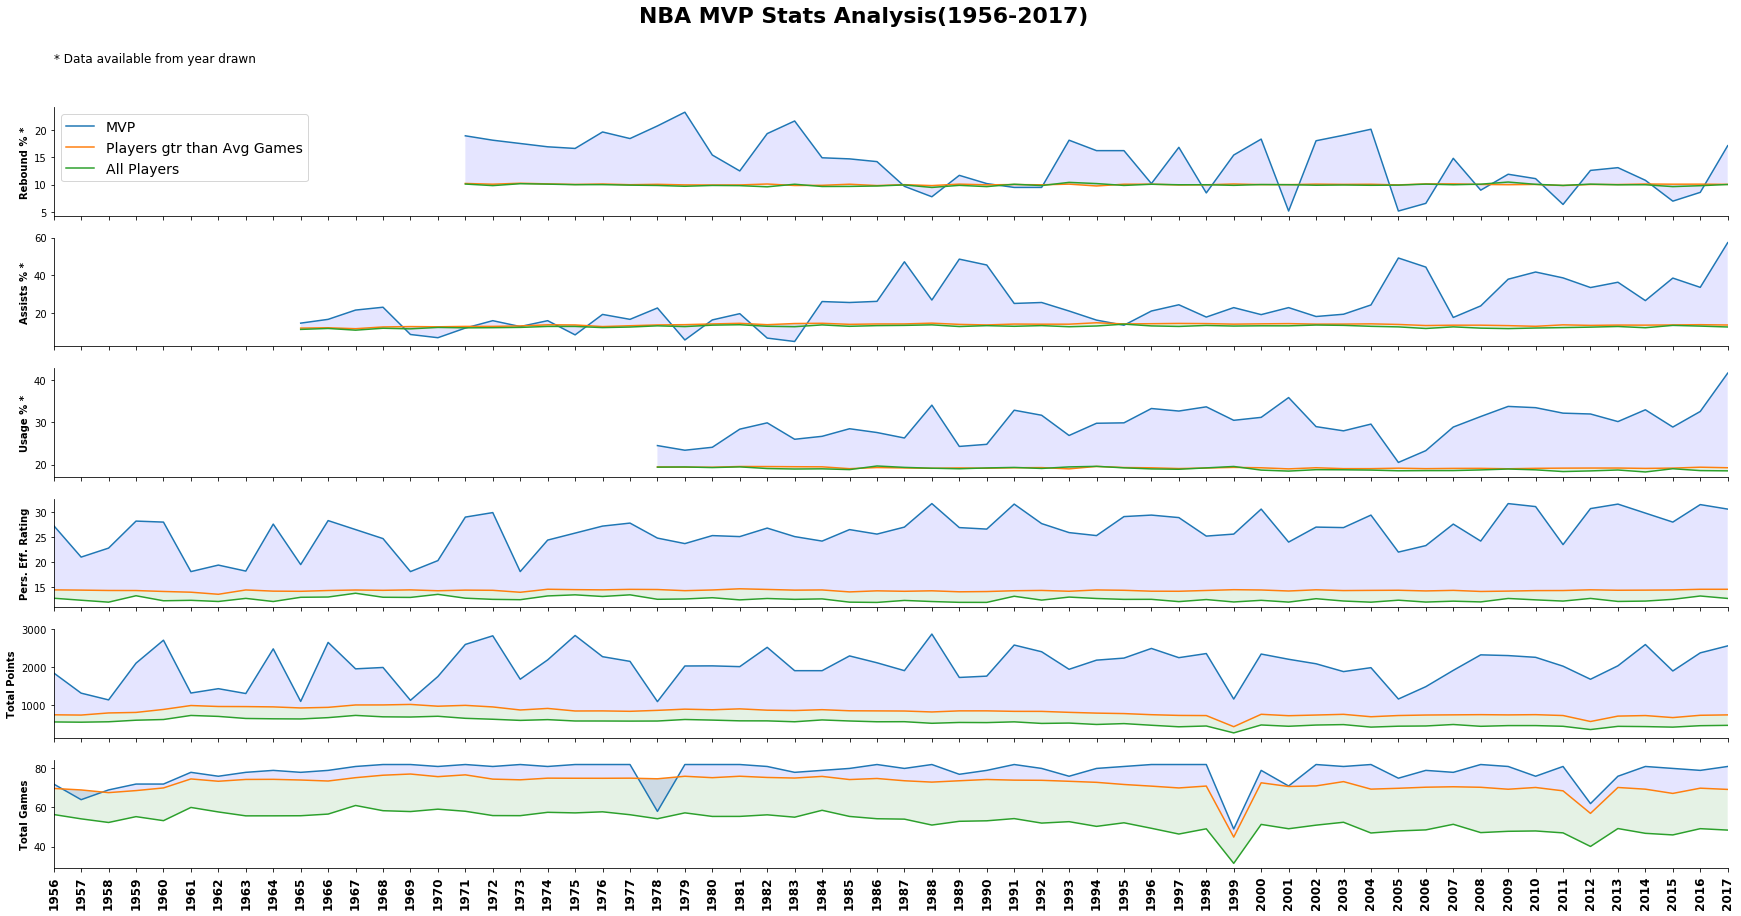

In [417]:
import matplotlib.pyplot as plt


charts = ['TRB%', 'AST%', 'USG%' ,'PER','PTS','G']
titles = ['Rebound % *', 'Assists % *', 'Usage % *','Pers. Eff. Rating','Total Points',  'Total Games']

fig , ax = plt.subplots(len(charts),1, sharex = True, figsize = (30,14))

for i in range(len(charts)):
    ax[i].plot( df_MVP_Stats['Year'], df_MVP_Stats[ charts[i]], label = 'MVP') # MVP Stats 
    ax[i].plot(df_AboveAvgGames.groupby(['Year'])[charts[i]].mean(), label = 'Players gtr than Avg Games') # Mean Stats for Players who have played more than avg games
    ax[i].plot(df_AllNBA.groupby(['Year'])[charts[i]].mean(), label = 'All Players')  # Mean Stats for All NBA Players 
        
    ax[i].set_ylabel(titles[i], fontweight = 'bold')
    ax[i].set_xticks(df_MVP_Stats['Year'])
    
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    
    ax[i].fill_between( df_MVP_Stats['Year'],df_MVP_Stats[ charts[i]], df_AboveAvgGames.groupby(['Year'])[charts[i]].mean() , facecolor='blue', alpha = 0.1)

    ax[i].fill_between( df_MVP_Stats['Year'], df_AboveAvgGames.groupby(['Year'])[charts[i]].mean() ,df_AllNBA.groupby(['Year'])[charts[i]].mean(), facecolor='green', alpha = 0.1)

    ax[i].set_xlim(df_MVP_Stats['Year'].min() ,df_MVP_Stats['Year'].max() )
    for labels in ax[i].xaxis.get_ticklabels():
        labels.set_rotation(90)
        labels.set_fontsize(12)
        labels.set_fontweight('bold')
        
plt.suptitle("NBA MVP Stats Analysis(1956-2017)", fontsize = 22 , fontweight = 'bold')


ax[0].legend( fontsize = 14)# Title for the legend)

fig.text(0.125,0.925,'* Data available from year drawn', fontsize = 12)

# plt.subplots_adjust(right=0.85)
plt.savefig('myfig.png')
plt.show()
